## Sprint1 機械学習フロー
### 【問題1】クロスバリデーション
事前学習期間では検証データをはじめに分割しておき、それに対して指標値を計算することで検証を行っていました。（ホールドアウト法）しかし、分割の仕方により精度は変化します。実践的には クロスバリデーション（交差検証） を行います。分割を複数回行い、それぞれに対して学習と検証を行う方法です。複数回の分割のためにscikit-learnにはKFoldクラスが用意されています。


事前学習期間の課題で作成したベースラインモデルに対してKFoldクラスによるクロスバリデーションを行うコードを作成し実行してください。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
train_data = pd.read_csv("application_train.csv")

In [2]:
# データ取得
pd.set_option('display.max_columns', 122)
pd.set_option('display.max_rows', 122)
train_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
# 使用する特徴量とターゲットを抽出する
train_data = train_data[["DAYS_BIRTH","EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
train_data = train_data.dropna(how="any")
train_data[["DAYS_BIRTH","EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]]

,DAYS_BIRTH,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,-9461,0.083037,0.262949,0.139376
6,-13778,0.774761,0.724000,0.492060
8,-20099,0.587334,0.205747,0.751724
10,-10197,0.319760,0.651862,0.363945
11,-20417,0.722044,0.555183,0.652897
...,...,...,...,...
307499,-16988,0.665343,0.649123,0.206779
307500,-20390,0.896042,0.789389,0.337673
307503,-11870,0.243466,0.501221,0.609276
307508,-14966,0.744026,0.535722,0.218859


In [4]:
# 欠損値は削除しX、yに代入

train_data = train_data[["DAYS_BIRTH","EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
train_data = train_data.dropna(how="any")

X = train_data[["DAYS_BIRTH","EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]]
print(X)
y = train_data["TARGET"]
print(y)
sum(y==1)

        DAYS_BIRTH  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3
0            -9461      0.083037      0.262949      0.139376
6           -13778      0.774761      0.724000      0.492060
8           -20099      0.587334      0.205747      0.751724
10          -10197      0.319760      0.651862      0.363945
11          -20417      0.722044      0.555183      0.652897
...            ...           ...           ...           ...
307499      -16988      0.665343      0.649123      0.206779
307500      -20390      0.896042      0.789389      0.337673
307503      -11870      0.243466      0.501221      0.609276
307508      -14966      0.744026      0.535722      0.218859
307510      -16856      0.734460      0.708569      0.113922

[109589 rows x 4 columns]
0         1
6         0
8         0
10        0
11        0
         ..
307499    0
307500    0
307503    0
307508    0
307510    0
Name: TARGET, Length: 109589, dtype: int64


7998

In [5]:
# クロスバリデーションを実施。　右記でも可能。cross_validate(clf, X, y, cv=skf, scoring=score_funcs)
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

kf = StratifiedKFold(n_splits=4,random_state=1)
score_probs = []

for tr_idx, va_idx in kf.split(X,y):
    # 学習データとバリデーションに分ける
    tr_X, va_X = X.iloc[tr_idx], X.iloc[va_idx]
    tr_y, va_y = y.iloc[tr_idx], y.iloc[va_idx]
    
    # 標準化
    sscaler = StandardScaler()
    sscaler.fit(tr_X)
    tr_X_scalered = sscaler.transform(tr_X)
    va_X_scalered = sscaler.transform(va_X)
    
    #モデル学習(ランダムフォレストとした)
    rfc = RandomForestClassifier(n_estimators=1,criterion="gini",max_depth=10,random_state=1,min_samples_split = 5)
    rfc.fit(tr_X_scalered,tr_y)
    predicted_label = rfc.predict_proba(va_X_scalered)
    
    #スコア算出
    score = roc_auc_score(va_y,predicted_label[:,1])
    
    #スコアを記録
    score_probs.append(score)

print(score_probs)
print(np.mean(score_probs))

[0.6933924423182928, 0.6798055260256712, 0.6805350170951292, 0.6893350305502793]
0.6857670039973431


### 【問題2】グリッドサーチ
これまで分類器のパラメータには触れず、デフォルトの設定を使用していました。パラメータの詳細は今後のSprintで学んでいくことになります。機械学習の前提として、パラメータは状況に応じて最適なものを選ぶ必要があります。最適なパラメータを探していくことを パラメータチューニング と呼びます。パラメータチューニングをある程度自動化する単純な方法としては グリッドサーチ があります。


scikit-learnのGridSearchCVを使い、グリッドサーチを行うコードを作成してください。そして、ベースラインモデルに対して何らかしらのパラメータチューニングを行なってください。どのパラメータをチューニングするかは、使用した手法の公式ドキュメントを参考にしてください。

### ランダムフォレスト

In [6]:
from sklearn.ensemble import RandomForestClassifier

kf = StratifiedKFold(n_splits=4,random_state=1)
score_probs = []

for tr_idx, va_idx in kf.split(X,y):
    # 学習データとバリデーションに分ける
    tr_X, va_X = X.iloc[tr_idx], X.iloc[va_idx]
    tr_y, va_y = y.iloc[tr_idx], y.iloc[va_idx]
    
    # 標準化
    sscaler = StandardScaler()
    sscaler.fit(tr_X)
    tr_X_scalered = sscaler.transform(tr_X)
    va_X_scalered = sscaler.transform(va_X)
    
    #モデル学習
    rfc = RandomForestClassifier(n_estimators=1,criterion="gini",max_depth=10,random_state=1,min_samples_split = 5)
    rfc.fit(tr_X_scalered,tr_y)
    predicted_label = rfc.predict_proba(va_X_scalered)
    
    #スコア算出
    score = roc_auc_score(va_y,predicted_label[:,1])
    
    #スコアを記録
    score_probs.append(score)

print(score_probs)
print(np.mean(score_probs))

[0.6933924423182928, 0.6798055260256712, 0.6805350170951292, 0.6893350305502793]
0.6857670039973431


In [13]:
#　グリッドサーチを実施。チューニングパラメータは'max_depth'、'min_samples_split'　とした。
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


def param():
  ret = {
      'max_depth':[i for i in range(1, 21,5)],
      'min_samples_split':[i for i in range(2, 21,5)]
  }
  return ret

sscaler = StandardScaler()
sscaler.fit(x_train)
X_scalered = sscaler.transform(x_train)

gscv = GridSearchCV(RandomForestClassifier(n_estimators=10,random_state=1), param(), cv=4, verbose=2,scoring="roc_auc")
gscv.fit(X_scalered, y_train)


Fitting 4 folds for each of 16 candidates, totalling 64 fits
[CV] max_depth=1, min_samples_split=2 ................................
[CV] ................. max_depth=1, min_samples_split=2, total=   0.2s
[CV] max_depth=1, min_samples_split=2 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ................. max_depth=1, min_samples_split=2, total=   0.2s
[CV] max_depth=1, min_samples_split=2 ................................
[CV] ................. max_depth=1, min_samples_split=2, total=   0.2s
[CV] max_depth=1, min_samples_split=2 ................................
[CV] ................. max_depth=1, min_samples_split=2, total=   0.2s
[CV] max_depth=1, min_samples_split=7 ................................
[CV] ................. max_depth=1, min_samples_split=7, total=   0.2s
[CV] max_depth=1, min_samples_split=7 ................................
[CV] ................. max_depth=1, min_samples_split=7, total=   0.2s
[CV] max_depth=1, min_samples_split=7 ................................
[CV] ................. max_depth=1, min_samples_split=7, total=   0.2s
[CV] max_depth=1, min_samples_split=7 ................................
[CV] ................. max_depth=1, min_samples_split=7, total=   0.2s
[CV] max_depth=1, min_samples_split=12 ...............................
[CV] .

[CV] ............... max_depth=16, min_samples_split=12, total=   1.1s
[CV] max_depth=16, min_samples_split=17 ..............................
[CV] ............... max_depth=16, min_samples_split=17, total=   1.1s
[CV] max_depth=16, min_samples_split=17 ..............................
[CV] ............... max_depth=16, min_samples_split=17, total=   1.1s
[CV] max_depth=16, min_samples_split=17 ..............................
[CV] ............... max_depth=16, min_samples_split=17, total=   1.0s
[CV] max_depth=16, min_samples_split=17 ..............................
[CV] ............... max_depth=16, min_samples_split=17, total=   1.0s


[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:   41.7s finished


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_d

In [14]:
# スコアの高かったパラメータを表示
gscv.best_params_

{'max_depth': 6, 'min_samples_split': 17}

In [15]:
# 参考として計算結果を表示
gs_result = pd.DataFrame.from_dict(gscv.cv_results_) #詳細表示
gs_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.158156,0.012917,0.011643,0.000184,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.696687,0.691999,0.700022,0.702674,0.697846,0.003987,10
1,0.149733,0.007400,0.011869,0.000426,1,7,"{'max_depth': 1, 'min_samples_split': 7}",0.696687,0.691999,0.700022,0.702674,0.697846,0.003987,10
2,0.155608,0.003677,0.012498,0.000651,1,12,"{'max_depth': 1, 'min_samples_split': 12}",0.696687,0.691999,0.700022,0.702674,0.697846,0.003987,10
3,0.147670,0.001387,0.011937,0.000192,1,17,"{'max_depth': 1, 'min_samples_split': 17}",0.696687,0.691999,0.700022,0.702674,0.697846,0.003987,10
4,0.511192,0.010664,0.018407,0.000580,6,2,"{'max_depth': 6, 'min_samples_split': 2}",0.734891,0.727168,0.738790,0.743512,0.736090,0.005988,2
5,0.502232,0.007082,0.017726,0.000767,6,7,"{'max_depth': 6, 'min_samples_split': 7}",0.734849,0.726602,0.738356,0.743015,0.735705,0.006001,4
6,0.533341,0.015679,0.018553,0.000753,6,12,"{'max_depth': 6, 'min_samples_split': 12}",0.734855,0.727067,0.739588,0.742024,0.735884,0.005706,3
7,0.505253,0.008604,0.017824,0.000231,6,17,"{'max_depth': 6, 'min_samples_split': 17}",0.735511,0.727246,0.739585,0.744370,0.736678,0.006284,1
8,0.800197,0.005398,0.024738,0.000206,11,2,"{'max_depth': 11, 'min_samples_split': 2}",0.724729,0.721851,0.724373,0.729336,0.725072,0.002700,8
9,0.790332,0.002945,0.025077,0.000449,11,7,"{'max_depth': 11, 'min_samples_split': 7}",0.727538,0.717252,0.724763,0.732059,0.725403,0.005378,7


In [16]:
# valデータで最も良かったモデルで評価。スコアを表示

X_test_scalered = sscaler.transform(x_test)

best_clf = gscv.best_estimator_
predicted_label = best_clf.predict_proba(X_test_scalered)
score = roc_auc_score(y_test,predicted_label[:,1])
score

0.7433423876632538

In [17]:
from sklearn.ensemble import RandomForestClassifier

kf = StratifiedKFold(n_splits=4,random_state=1)
score_probs = []

for tr_idx, va_idx in kf.split(X,y):
    # 学習データとバリデーションに分ける
    tr_X, va_X = X.iloc[tr_idx], X.iloc[va_idx]
    tr_y, va_y = y.iloc[tr_idx], y.iloc[va_idx]
    
    # 標準化
    sscaler = StandardScaler()
    sscaler.fit(tr_X)
    tr_X_scalered = sscaler.transform(tr_X)
    va_X_scalered = sscaler.transform(va_X)
    
    #モデル学習
    rfc = RandomForestClassifier(n_estimators=1,criterion="gini",max_depth=6,random_state=1,min_samples_split = 7)
    rfc.fit(tr_X_scalered,tr_y)
    predicted_label = rfc.predict_proba(va_X_scalered)
    
    #スコア算出
    score = roc_auc_score(va_y,predicted_label[:,1])
    
    #スコアを記録
    score_probs.append(score)

print(score_probs)
print(np.mean(score_probs))

[0.7256212398614064, 0.7182434148358138, 0.7237825346250573, 0.7272273278821558]
0.7237186293011083


### 【問題3】Kaggle Notebooksからの調査
KaggleのNotebooksから様々なアイデアを見つけ出して、列挙してください。

>xgboost

>lightgbm

>early_stopping_rounds

>lgb.plot_importance

### 【問題4】高い汎化性能のモデル作成
問題3で見つけたアイデアと、独自のアイデアを組み合わせ高い汎化性能のモデル作りを進めてください。
その過程として、何を行うことで、クロスバリデーションの結果がどの程度変化したかを表にまとめてください。

xgboostはカグル上位者でもよく使われるモデルであり、勾配ブースティングという弱学習器に決定木を直列に幾度も計算させ目的関数の結果に重みをつけて次の学習を繰り返すことで目的関数を最小化する。そのため、精度も上げやすいと言われている。
今回、これまでと同様のデータに対して、xgboosによるモデルと、これまでのクロスバリデーションを組み合わせて、高い汎化性能を実現できるか確認する。

In [18]:
import xgboost as xgb

kf = StratifiedKFold(n_splits=4)
score_probs = []

for tr_idx, va_idx in kf.split(X,y):
    # 学習データとバリデーションに分ける
    tr_X, va_X = X.iloc[tr_idx], X.iloc[va_idx]
    tr_y, va_y = y.iloc[tr_idx], y.iloc[va_idx]
    
    # 標準化
    sscaler = StandardScaler()
    sscaler.fit(tr_X)
    tr_X_scalered = sscaler.transform(tr_X)
    va_X_scalered = sscaler.transform(va_X)
    
    # XGBoost が扱うデータセットの形式に直す
    dtrain = xgb.DMatrix(tr_X_scalered, label=tr_y)
    dtest = xgb.DMatrix(va_X_scalered, label=va_y)
    
    #モデル学習
    params={'booster':'gbtree','objective':'binary:logistic','eval_metric': 'logloss','eta':0.1,'gamma':0,'alpha':0,'lambda':1,'min_child_weight':1,'maxdepth':5,'subsample':0.8,'colsample':0.8,'cosample_bytree':0.8,'ramdom_state':71}
    num_round=100
    bst = xgb.train(params,
                    dtrain,
                    num_round
                    )
    
    #確率予測を返す
    predicted_label = bst.predict(dtest)
    
    #スコア算出
    score = roc_auc_score(va_y,predicted_label)
    
    #スコアを記録
    score_probs.append(score)

print(score_probs)
print(np.mean(score_probs))

/Users/mishibatoshihiro/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/mishibatoshihiro/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/mishibatoshihiro/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/mishibatoshihiro/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0.7397841562327742, 0.7425126978502243, 0.7401902876786847, 0.7428258760635977]
0.7413282544563202


結果、ランダムフォレストではAUC平均：0.685（チューニングなし）、AUC平均：0.723（チューニングなし）に対し、今回のxgboostではAUC平均：0.741であり精度向上された。かつ、クロスバリデーションでの4fold分の結果も偏りなくAUC値も出せているため、汎化性能も高いと考えられる。

さらにカグルでのカーネルに学習モデルとしてlightgbmも紹介されていた。これは、xgboostと基本的にGBDT（勾配ブースティング木）であることは同じであるが、Leaf-wiseという決定木を全体で見渡して、「分岐させるべき葉」を優先的に分岐させ流ことができる。（xgboostはLeave-wiseで「層ごとに一括で」分岐を進める）また、訓練データをヒストグラム化して計算するので非常に細かい数値だったデータがヒストグラムにすることで「大雑把にまとめられた」データになり高速でモデル構築を進めることができる。以下lightgbmも今回のクロスバリデーションと組み合わせ確認する。

In [19]:
import lightgbm as lgb

kf = StratifiedKFold(n_splits=4)
score_probs_gbm = []

for tr_idx, va_idx in kf.split(X,y):
    # 学習データとバリデーションに分ける
    tr_X, va_X = X.iloc[tr_idx], X.iloc[va_idx]
    tr_y, va_y = y.iloc[tr_idx], y.iloc[va_idx]
    
    # 標準化
    sscaler = StandardScaler()
    sscaler.fit(tr_X)
    tr_X_scalered = sscaler.transform(tr_X)
    va_X_scalered = sscaler.transform(va_X)
    
    # lightgbm が扱うデータセットの形式に直す
    dtrain = lgb.Dataset(tr_X_scalered, label=tr_y)
    dtest = lgb.Dataset(va_X_scalered, label=va_y, reference= dtrain)
    
    #モデル学習
    params= {'objective':'binary','learning_rate':0.1,'reg_alpha':0,'leg_lambda':1,'min_child_weight':1,'max_depth':5,'subsample':0.8,'colsample':0.8,'colsample_bytree':0.8,'ramdom_state':71}
    gbm = lgb.train(params,
                    dtrain,
                    valid_sets=dtest,
                    num_boost_round=100,
                    verbose_eval=10
                    )
    
    #確率予測を返す
    predicted_label_gbm = gbm.predict(va_X_scalered)
    
    #スコア算出
    score_gbm = roc_auc_score(va_y,predicted_label_gbm)
    
    #スコアを記録
    score_probs_gbm.append(score_gbm)

print(score_probs_gbm)
print(np.mean(score_probs_gbm))

/Users/mishibatoshihiro/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


[10]	valid_0's binary_logloss: 0.238444
[20]	valid_0's binary_logloss: 0.234626
[30]	valid_0's binary_logloss: 0.233845
[40]	valid_0's binary_logloss: 0.233692
[50]	valid_0's binary_logloss: 0.23391
[60]	valid_0's binary_logloss: 0.233935
[70]	valid_0's binary_logloss: 0.233948
[80]	valid_0's binary_logloss: 0.234098
[90]	valid_0's binary_logloss: 0.234234
[100]	valid_0's binary_logloss: 0.234401
[10]	valid_0's binary_logloss: 0.237799
[20]	valid_0's binary_logloss: 0.233797
[30]	valid_0's binary_logloss: 0.232913
[40]	valid_0's binary_logloss: 0.232692
[50]	valid_0's binary_logloss: 0.232562
[60]	valid_0's binary_logloss: 0.232548
[70]	valid_0's binary_logloss: 0.232787
[80]	valid_0's binary_logloss: 0.232923
[90]	valid_0's binary_logloss: 0.233027
[100]	valid_0's binary_logloss: 0.233148
[10]	valid_0's binary_logloss: 0.238769
[20]	valid_0's binary_logloss: 0.234882
[30]	valid_0's binary_logloss: 0.234016
[40]	valid_0's binary_logloss: 0.233827
[50]	valid_0's binary_logloss: 0.233827

この結果からAUC平均：0.742でほぼxgboostと同等の評価結果となることが分かった。
しかし、バリデーションデータの目的関数logglossの途中結果を観察すると、学習が100回未満の地点で最小になり、そこから大きくなってしまっていることがわかる。
（Fold1:約40〜50回地点、Fold2:約60〜70回地点、Fold3:約40〜50回地点、Fold4:約40〜50回地点）よって、それ以上学習してtrainデータをか学習してバリデーションデータに対する予測を下げないために、目的関数が最小になったところで止める必要がある。
この手法として、**early_stopping_rounds**　がカグルで紹介されていた。この数値を規定すると、その数値の回数まで観察をしてみて目的関数が最小のところで評価可能であるとのことでこちらを使い同様に評価を行ってみる。

In [20]:
import lightgbm as lgb

kf = StratifiedKFold(n_splits=4)
score_probs_gbm = []

for tr_idx, va_idx in kf.split(X,y):
    # 学習データとバリデーションに分ける
    tr_X, va_X = X.iloc[tr_idx], X.iloc[va_idx]
    tr_y, va_y = y.iloc[tr_idx], y.iloc[va_idx]
    
    # 標準化
    sscaler = StandardScaler()
    sscaler.fit(tr_X)
    tr_X_scalered = sscaler.transform(tr_X)
    va_X_scalered = sscaler.transform(va_X)
    
    # lightgbm が扱うデータセットの形式に直す
    dtrain = lgb.Dataset(tr_X_scalered, label=tr_y)
    dtest = lgb.Dataset(va_X_scalered, label=va_y, reference= dtrain)
    
    #モデル学習
    params= {'objective':'binary','learning_rate':0.1,'reg_alpha':0,'leg_lambda':1,'min_child_weight':1,'max_depth':5,'subsample':0.8,'colsample':0.8,'colsample_bytree':0.8,'ramdom_state':71}
    gbm = lgb.train(params,
                    dtrain,
                    valid_sets=dtest,
                    num_boost_round=100,
                    verbose_eval=10,
                    early_stopping_rounds=80,
                    )
    
    #確率予測を返す
    predicted_label_gbm = gbm.predict(va_X_scalered)
    
    #スコア算出
    score_gbm = roc_auc_score(va_y,predicted_label_gbm)
    
    #スコアを記録
    score_probs_gbm.append(score_gbm)

print(score_probs_gbm)
print(np.mean(score_probs_gbm))

Training until validation scores don't improve for 80 rounds
[10]	valid_0's binary_logloss: 0.238444
[20]	valid_0's binary_logloss: 0.234626
[30]	valid_0's binary_logloss: 0.233845
[40]	valid_0's binary_logloss: 0.233692
[50]	valid_0's binary_logloss: 0.23391
[60]	valid_0's binary_logloss: 0.233935
[70]	valid_0's binary_logloss: 0.233948
[80]	valid_0's binary_logloss: 0.234098
[90]	valid_0's binary_logloss: 0.234234
[100]	valid_0's binary_logloss: 0.234401
Did not meet early stopping. Best iteration is:
[40]	valid_0's binary_logloss: 0.233692
Training until validation scores don't improve for 80 rounds
[10]	valid_0's binary_logloss: 0.237799
[20]	valid_0's binary_logloss: 0.233797
[30]	valid_0's binary_logloss: 0.232913
[40]	valid_0's binary_logloss: 0.232692
[50]	valid_0's binary_logloss: 0.232562
[60]	valid_0's binary_logloss: 0.232548
[70]	valid_0's binary_logloss: 0.232787
[80]	valid_0's binary_logloss: 0.232923
[90]	valid_0's binary_logloss: 0.233027
[100]	valid_0's binary_logloss

狙い通り、100回未満の目的関数が最小の地点で評価できていることがわかる。
（Fold1:40回地点、Fold2:60回地点、Fold3:46回地点、Fold4:42回地点）
AUC平均：0.744で前回のAUC平均：0.741よりも少しではあるが向上していることを確認できた。
最後にこのlightgbmでグリッドサーチを実施する。

In [21]:
# lightgbでのグリッドサーチ
import lightgbm as lgb

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

scaler = StandardScaler()
scaler.fit(x_train)
X_scalered = scaler.transform(x_train)

skf = StratifiedKFold(n_splits=4,shuffle=True,random_state=0)
model2 = lgb.LGBMClassifier(silent=False)

# パラメーターを設定する
param_grid2 = {"max_depth": [5, 10, 25, 50],
              "learning_rate" : [0.001,0.01,0.1],
              "num_leaves": [31,100,300,500],
             }
# パラメータチューニングをグリッドサーチで行うために設定する
## このGridSearchCV には注意が必要 scoring は そのスコアを基準にして最適化する
grid_result = GridSearchCV(estimator = model2,
                           param_grid = param_grid2,
                           scoring = 'roc_auc',
                           cv = skf,
                           verbose=10,
                           return_train_score = True)

grid_result.fit(X_scalered, y_train)

Fitting 4 folds for each of 48 candidates, totalling 192 fits
[CV] learning_rate=0.001, max_depth=5, num_leaves=31 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.001, max_depth=5, num_leaves=31, score=(train=0.744, test=0.726), total=   0.2s
[CV] learning_rate=0.001, max_depth=5, num_leaves=31 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  learning_rate=0.001, max_depth=5, num_leaves=31, score=(train=0.743, test=0.738), total=   0.2s
[CV] learning_rate=0.001, max_depth=5, num_leaves=31 .................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  learning_rate=0.001, max_depth=5, num_leaves=31, score=(train=0.746, test=0.731), total=   0.3s
[CV] learning_rate=0.001, max_depth=5, num_leaves=31 .................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s


[CV]  learning_rate=0.001, max_depth=5, num_leaves=31, score=(train=0.745, test=0.722), total=   0.2s
[CV] learning_rate=0.001, max_depth=5, num_leaves=100 ................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.3s remaining:    0.0s


[CV]  learning_rate=0.001, max_depth=5, num_leaves=100, score=(train=0.744, test=0.727), total=   0.2s
[CV] learning_rate=0.001, max_depth=5, num_leaves=100 ................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.6s remaining:    0.0s


[CV]  learning_rate=0.001, max_depth=5, num_leaves=100, score=(train=0.743, test=0.739), total=   0.2s
[CV] learning_rate=0.001, max_depth=5, num_leaves=100 ................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.9s remaining:    0.0s


[CV]  learning_rate=0.001, max_depth=5, num_leaves=100, score=(train=0.747, test=0.732), total=   0.2s
[CV] learning_rate=0.001, max_depth=5, num_leaves=100 ................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.2s remaining:    0.0s


[CV]  learning_rate=0.001, max_depth=5, num_leaves=100, score=(train=0.747, test=0.723), total=   0.2s
[CV] learning_rate=0.001, max_depth=5, num_leaves=300 ................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.5s remaining:    0.0s


[CV]  learning_rate=0.001, max_depth=5, num_leaves=300, score=(train=0.744, test=0.727), total=   0.2s
[CV] learning_rate=0.001, max_depth=5, num_leaves=300 ................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.8s remaining:    0.0s


[CV]  learning_rate=0.001, max_depth=5, num_leaves=300, score=(train=0.743, test=0.739), total=   0.2s
[CV] learning_rate=0.001, max_depth=5, num_leaves=300 ................
[CV]  learning_rate=0.001, max_depth=5, num_leaves=300, score=(train=0.747, test=0.732), total=   0.3s
[CV] learning_rate=0.001, max_depth=5, num_leaves=300 ................
[CV]  learning_rate=0.001, max_depth=5, num_leaves=300, score=(train=0.747, test=0.723), total=   0.2s
[CV] learning_rate=0.001, max_depth=5, num_leaves=500 ................
[CV]  learning_rate=0.001, max_depth=5, num_leaves=500, score=(train=0.744, test=0.727), total=   0.2s
[CV] learning_rate=0.001, max_depth=5, num_leaves=500 ................
[CV]  learning_rate=0.001, max_depth=5, num_leaves=500, score=(train=0.743, test=0.739), total=   0.2s
[CV] learning_rate=0.001, max_depth=5, num_leaves=500 ................
[CV]  learning_rate=0.001, max_depth=5, num_leaves=500, score=(train=0.747, test=0.732), total=   0.2s
[CV] learning_rate=0.001, m

[CV]  learning_rate=0.001, max_depth=50, num_leaves=300, score=(train=0.791, test=0.721), total=   0.9s
[CV] learning_rate=0.001, max_depth=50, num_leaves=300 ...............
[CV]  learning_rate=0.001, max_depth=50, num_leaves=300, score=(train=0.791, test=0.735), total=   0.9s
[CV] learning_rate=0.001, max_depth=50, num_leaves=300 ...............
[CV]  learning_rate=0.001, max_depth=50, num_leaves=300, score=(train=0.794, test=0.729), total=   1.0s
[CV] learning_rate=0.001, max_depth=50, num_leaves=300 ...............
[CV]  learning_rate=0.001, max_depth=50, num_leaves=300, score=(train=0.793, test=0.715), total=   0.9s
[CV] learning_rate=0.001, max_depth=50, num_leaves=500 ...............
[CV]  learning_rate=0.001, max_depth=50, num_leaves=500, score=(train=0.817, test=0.700), total=   1.3s
[CV] learning_rate=0.001, max_depth=50, num_leaves=500 ...............
[CV]  learning_rate=0.001, max_depth=50, num_leaves=500, score=(train=0.822, test=0.722), total=   1.3s
[CV] learning_rate=0.

[CV]  learning_rate=0.01, max_depth=25, num_leaves=300, score=(train=0.855, test=0.730), total=   1.0s
[CV] learning_rate=0.01, max_depth=25, num_leaves=300 ................
[CV]  learning_rate=0.01, max_depth=25, num_leaves=300, score=(train=0.851, test=0.736), total=   1.0s
[CV] learning_rate=0.01, max_depth=25, num_leaves=300 ................
[CV]  learning_rate=0.01, max_depth=25, num_leaves=300, score=(train=0.853, test=0.733), total=   0.9s
[CV] learning_rate=0.01, max_depth=25, num_leaves=300 ................
[CV]  learning_rate=0.01, max_depth=25, num_leaves=300, score=(train=0.857, test=0.726), total=   1.0s
[CV] learning_rate=0.01, max_depth=25, num_leaves=500 ................
[CV]  learning_rate=0.01, max_depth=25, num_leaves=500, score=(train=0.895, test=0.719), total=   1.3s
[CV] learning_rate=0.01, max_depth=25, num_leaves=500 ................
[CV]  learning_rate=0.01, max_depth=25, num_leaves=500, score=(train=0.891, test=0.729), total=   1.3s
[CV] learning_rate=0.01, ma

[CV]  learning_rate=0.1, max_depth=10, num_leaves=300, score=(train=0.952, test=0.719), total=   0.6s
[CV] learning_rate=0.1, max_depth=10, num_leaves=300 .................
[CV]  learning_rate=0.1, max_depth=10, num_leaves=300, score=(train=0.954, test=0.723), total=   1.3s
[CV] learning_rate=0.1, max_depth=10, num_leaves=300 .................
[CV]  learning_rate=0.1, max_depth=10, num_leaves=300, score=(train=0.949, test=0.721), total=   0.6s
[CV] learning_rate=0.1, max_depth=10, num_leaves=300 .................
[CV]  learning_rate=0.1, max_depth=10, num_leaves=300, score=(train=0.951, test=0.713), total=   0.6s
[CV] learning_rate=0.1, max_depth=10, num_leaves=500 .................
[CV]  learning_rate=0.1, max_depth=10, num_leaves=500, score=(train=0.957, test=0.716), total=   0.7s
[CV] learning_rate=0.1, max_depth=10, num_leaves=500 .................
[CV]  learning_rate=0.1, max_depth=10, num_leaves=500, score=(train=0.957, test=0.723), total=   0.6s
[CV] learning_rate=0.1, max_depth

[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed:  2.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=0, shuffle=True),
             error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=False,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='warn', n_jobs=None,
             p

In [22]:
grid_result.best_params_

{'learning_rate': 0.01, 'max_depth': 10, 'num_leaves': 31}

In [23]:
gs2_result = pd.DataFrame.from_dict(grid_result.cv_results_) #詳細表示
gs2_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_num_leaves,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.193696,0.034194,0.031037,0.004777,0.001,5,31,"{'learning_rate': 0.001, 'max_depth': 5, 'num_...",0.726286,0.737935,0.731483,0.721501,0.729302,0.006108,30,0.743600,0.743121,0.746197,0.745486,0.744601,0.001277
1,0.171575,0.000472,0.025996,0.001089,0.001,5,100,"{'learning_rate': 0.001, 'max_depth': 5, 'num_...",0.726790,0.738576,0.731976,0.722803,0.730036,0.005906,24,0.743705,0.743319,0.746628,0.747018,0.745167,0.001667
2,0.194387,0.046441,0.025186,0.000691,0.001,5,300,"{'learning_rate': 0.001, 'max_depth': 5, 'num_...",0.726790,0.738576,0.731976,0.722803,0.730036,0.005906,24,0.743705,0.743319,0.746628,0.747018,0.745167,0.001667
3,0.173624,0.003959,0.026249,0.002779,0.001,5,500,"{'learning_rate': 0.001, 'max_depth': 5, 'num_...",0.726790,0.738576,0.731976,0.722803,0.730036,0.005906,24,0.743705,0.743319,0.746628,0.747018,0.745167,0.001667
4,0.303688,0.101949,0.033101,0.001785,0.001,10,31,"{'learning_rate': 0.001, 'max_depth': 10, 'num...",0.728448,0.737943,0.731136,0.720770,0.729574,0.006149,27,0.745415,0.742758,0.746462,0.743572,0.744552,0.001464
5,0.452661,0.080206,0.034046,0.001220,0.001,10,100,"{'learning_rate': 0.001, 'max_depth': 10, 'num...",0.728878,0.738260,0.734723,0.726689,0.732138,0.004596,18,0.761843,0.760675,0.763184,0.764658,0.762590,0.001488
6,1.037155,0.236703,0.060690,0.009822,0.001,10,300,"{'learning_rate': 0.001, 'max_depth': 10, 'num...",0.714501,0.730560,0.730541,0.707999,0.720900,0.009920,39,0.793896,0.795366,0.800826,0.798770,0.797214,0.002733
7,1.203555,0.115900,0.065891,0.003921,0.001,10,500,"{'learning_rate': 0.001, 'max_depth': 10, 'num...",0.705910,0.717120,0.720680,0.699047,0.710689,0.008654,44,0.817043,0.825145,0.830403,0.815741,0.822083,0.006005
8,0.259698,0.034217,0.031284,0.002852,0.001,25,31,"{'learning_rate': 0.001, 'max_depth': 25, 'num...",0.728448,0.737943,0.731136,0.720770,0.729574,0.006149,27,0.745415,0.742758,0.746462,0.743572,0.744552,0.001464
9,0.421558,0.021289,0.035094,0.001862,0.001,25,100,"{'learning_rate': 0.001, 'max_depth': 25, 'num...",0.728572,0.738353,0.734705,0.726722,0.732088,0.004670,19,0.761574,0.760410,0.762917,0.763469,0.762093,0.001191


In [31]:
# valデータで最も良かったモデルで評価。スコアを表示

X_test_scalered = sscaler.transform(x_test)

best_grid_result = grid_result.best_estimator_
predicted_label = best_grid_result.predict_proba(X_test_scalered)
score = roc_auc_score(y_test,predicted_label[:,1])
score

0.7398896671418831

グリッドサーチで'learning_rate': 0.01, 'max_depth': 10, 'num_leaves': 31のときにスコアが高いことがわかり、valデータでの結果はAUC:0.739で0.744より少し下がったが同程度となった。そのため今回はこのモデルでカグルに提出する。

### 【問題5】最終的なモデルの選定
最終的にこれは良いというモデルを選び、推定した結果をKaggleに提出してスコアを確認してください。どういったアイデアを取り入れ、どの程度のスコアになったかを記載してください。

In [32]:
test_data = pd.read_csv("application_test.csv")
test_data_1 = test_data[["DAYS_BIRTH","EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]]

#標準化
sscaler = StandardScaler()
sscaler.fit(x_train)
test_data_scalerd = sscaler.transform(test_data_1)

#最後のモデルで確率予測を返す
best_grid_result = grid_result.best_estimator_
predicted_label_gbm_2 = best_grid_result.predict_proba(test_data_scalerd)

#提出用のデータ型に変換
test_result_2 = np.hstack((test_data["SK_ID_CURR"].values.reshape(-1,1),predicted_label_gbm_2[:,1].reshape(-1,1)))

test_result_2 = pd.DataFrame(test_result_2,columns=["SK_ID_CURR","TARGET"])

test_result_2["SK_ID_CURR"] = test_result_2["SK_ID_CURR"].astype(int)

print(test_result_2)

#提出ファイルを作成
test_result_2.to_csv('Home Credit Default Risk_submission3.csv',index=False)

       SK_ID_CURR    TARGET
0          100001  0.056408
1          100005  0.084480
2          100013  0.041785
3          100028  0.058298
4          100038  0.093995
...           ...       ...
48739      456221  0.041785
48740      456222  0.041093
48741      456223  0.058220
48742      456224  0.068241
48743      456250  0.086987

[48744 rows x 2 columns]


提出スコア：0.69775

In [33]:
# 結果をまとめる
pd.DataFrame({"AUC score of val":["0.685","0.723","0.741","0.742","0.744","0.739 (kaggle 0.697)"]},index=["randomforest with cross val","randomforest with grid search","xgboost","lightgbm","lightgbm with earlystop","lightgbm with grid seach"])



,AUC score of val
randomforest with cross val,0.685
randomforest with grid search,0.723
xgboost,0.741
lightgbm,0.742
lightgbm with earlystop,0.744
lightgbm with grid seach,0.739 (kaggle 0.697)


## ※以降は自主学習



### lightgbでのoptuna
import optuna

def objective(trial):
    train_x, test_x, train_y, test_y = train_test_split(X_scalered, y, test_size=0.25)
    dtrain = lgb.Dataset(train_x, label=train_y)
    dtest = lgb.Dataset(test_x, label=test_y)
 
    param = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 50, 120),
    }
 
    gbm2 = lgb.train(param, dtrain,valid_sets=dtest)
    pred_label_2 = gbm2.predict(test_x)
    score = roc_auc_score(y,pred_label_2[:,1])
    return score

 
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
 
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)



### 特徴量重要度を表示する。

Columns_0 DAYS_BIRTH
Columns_1 EXT_SOURCE_1
Columns_2 EXT_SOURCE_2
Columns_3 EXT_SOURCE_3


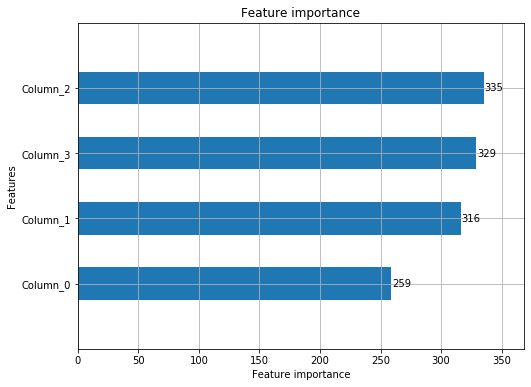

In [34]:
#lightgbmの特徴量重要度をグラフ化する。lgb.plot_importance（学習したモデル）を使用

Columns = ["Columns_0","Columns_1","Columns_2","Columns_3"]
Feature_dicted = dict(zip(Columns,tr_X.columns))
for i,j in Feature_dicted.items():
    print(i,j)
lgb.plot_importance(gbm, height=0.5, figsize=(8,6))

特徴量重要度から、このモデルにおいて　EXT_SOURCE_2、EXT_SOURCE_3、EXT_SOURCE_1、DAYS_BIRTH　の順で重要な特徴量であることが分かった。なお、特徴量重要度は「そのアルゴリズムにおいて」予測に重要だった特徴量を高く評価し、
絶対的な重要度を示す数値でないことに注意する必要がある。
（ex.ランダムフォレストで評価した以下結果はEXT_SOURCE_1、EXT_SOURCE_3、EXT_SOURCE_2、DAYS_BIRTH　の順で重要な特徴量であった）

ランダムフォレストの特徴量重要度（グリッドサーチで最も精度が高かったパラメータ使用時）

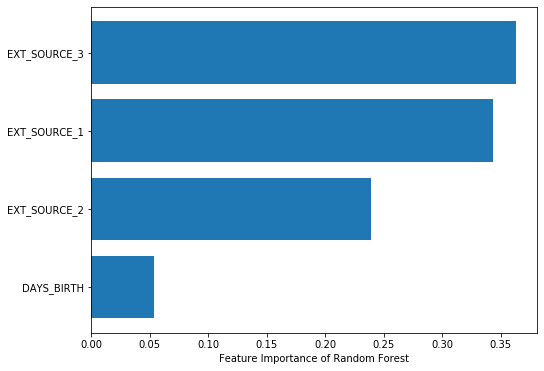

In [35]:
# 先ほど精度の最も良かったモデル（ランダムフォレスト）の特徴量の重要度を表示
imp_df = pd.DataFrame()
imp_df["feature"] = X.columns
imp_df["importance"] = best_clf.feature_importances_
imp_df = imp_df.sort_values("importance")

# 可視化
plt.figure(figsize=(8, 6))
plt.barh(imp_df.feature, imp_df.importance)
plt.xlabel("Feature Importance of Random Forest")
plt.show()

xgboostの特徴量重要度

In [36]:
# モデル.get_score(importance_type='total_gain') でスコアを取得可能。この関数はxgboostのみ
gain_score_xgb = bst.get_score(importance_type='total_gain')
gain_score_xgb

{'f3': 11228.499600407808,
 'f2': 8150.925577257403,
 'f1': 9607.264909852483,
 'f0': 4197.515972571406}

In [37]:
#降順にソートして出力
fscore_xgb_1 = sorted([[k,v] for k,v in gain_score_xgb.items()], key=lambda x:x[1]) #1列目を元に昇順し、リストで返している。
for l,o in fscore_xgb_1:
    print(l,o)

f0 4197.515972571406
f2 8150.925577257403
f1 9607.264909852483
f3 11228.499600407808


f0 DAYS_BIRTH
f1 EXT_SOURCE_1
f2 EXT_SOURCE_2
f3 EXT_SOURCE_3


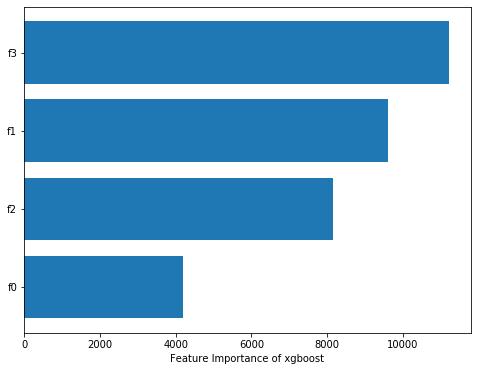

In [38]:
#グラフ化
imp_df = pd.DataFrame()
imp_df["feature"] = X.columns
imp_df["importance"] = best_clf.feature_importances_
imp_df = imp_df.sort_values("importance")

x = []
for i in range(0,4):
    x.append(fscore_xgb_1[i][0])
y = []
for i in range(0,4):
    y.append(fscore_xgb_1[i][1])

    
Columns = ["f0","f1","f2","f3"]
Feature_dicted = dict(zip(Columns,tr_X.columns))
for i,j in Feature_dicted.items():
    print(i,j)
    
# 可視化
plt.figure(figsize=(8, 6))
plt.barh(x, y)
plt.xlabel("Feature Importance of xgboost")
plt.show()

f0 DAYS_BIRTH
f1 EXT_SOURCE_1
f2 EXT_SOURCE_2
f3 EXT_SOURCE_3


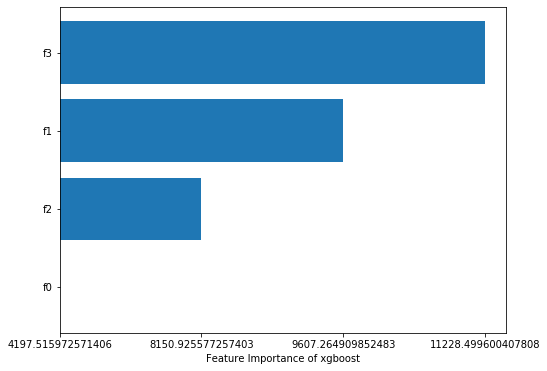

In [39]:
#グラフ化
imp_df = pd.DataFrame()
imp_df["feature"] = X.columns
imp_df["importance"] = best_clf.feature_importances_
imp_df = imp_df.sort_values("importance")

np.array(fscore_xgb_1)[:,0]

x = []
for i in range(0,4):
    x.append(fscore_xgb_1[i][0])
y = []
for i in range(0,4):
    y.append(fscore_xgb_1[i][1])

    
Columns = ["f0","f1","f2","f3"]
Feature_dicted = dict(zip(Columns,tr_X.columns))
for i,j in Feature_dicted.items():
    print(i,j)
    
# 可視化
plt.figure(figsize=(8, 6))
plt.barh(np.array(fscore_xgb_1)[:,0], np.array(fscore_xgb_1)[:,1])
plt.xlabel("Feature Importance of xgboost")
plt.show()